In [1]:
import pandas as pd

URL = r"data301/course-project-group_6012/data/raw/UniversitiesDataSet.csv" #change URL depending on your file setup
URL = r"C:\Users\Amritpal Aujla\data301\course-project-group_6012\data\raw\UniversitiesDataSet.csv"

def load_and_process(URL):
    
    df = pd.read_csv(URL)
    df = df.iloc[200:,].reset_index(drop=True) #removing data from 2012 and 2013 - aka first 200 rows#
    score_sum_2014 = df[df['year']==2014]['score'].sum()
    score_sum_2015 = df[df['year']==2015]['score'].sum()
    df["Score - Avg"] = df["score"] #create new column
    for i in range(len(df)): #editing score - avg column
        if df.iloc[i,13] == "2014":
            df.iloc[i,14] = df.iloc[i,12] - (score_sum_2014/1000)
        else:
            df.iloc[i,14] = df.iloc[i,12] - (score_sum_2015/1000)
    def highlight_cols(x): #highlighting important columns
        df = x.copy() # copy new df 
        df.loc[:, :] = 'background-color: white'  # change background to white
        df[['world_rank', 'alumni_employment']] = 'background-color: yellow' # change world rank and alumni employment column to yellow
        return df  # return new df
    display(df.style.apply(highlight_cols, axis = None))
    
load_and_process(URL) #calling function

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r"C:\Users\Amritpal Aujla\data301\course-project-group_6012\data\raw\UniversitiesDataSet.csv")

In [3]:
df.shape
df.head()
df.columns.tolist() # all the columns

['world_rank',
 'institution',
 'country',
 'national_rank',
 'quality_of_education',
 'alumni_employment',
 'quality_of_faculty',
 'publications',
 'influence',
 'citations',
 'broad_impact',
 'patents',
 'score',
 'year']

In [5]:
df=df.dropna() # getting rid of nan rows if any
df=df.reset_index(drop=True) # reseting index; easier for readability
df

world_rank                            institution         country  \
0              1                     Harvard University             USA   
1              2                    Stanford University             USA   
2              3  Massachusetts Institute of Technology             USA   
3              4                University of Cambridge  United Kingdom   
4              5                   University of Oxford  United Kingdom   
...          ...                                    ...             ...   
1995         996              University of the Algarve        Portugal   
1996         997                  Alexandria University           Egypt   
1997         998            Federal University of Ceará          Brazil   
1998         999                 University of A Coruña           Spain   
1999        1000        China Pharmaceutical University           China   

      national_rank  quality_of_education  alumni_employment  \
0                 1                     1                  1   
1                 2                    11                  2   
2                 3                     3                 11   
3                 1                     2                 10   
4                 2                     7                 12   
...             ...                   ...                ...   
1995              7                   367                567   
1996              4                   236                566   
1997             18                   367                549   
1998             40                   367                567   
1999             83                   367                567   

      quality_of_faculty  publications  influence  citations  broad_impact  \
0                      1             1          1          1           1.0   
1                      4             5          3          3           4.0   
2                      2            15          2          2           2.0   
3                      5            10          9         12          13.0   
4                     10            11         12         11          12.0   
...                  ...           ...        ...        ...           ...   
1995                 218           926        845        812         969.0   
1996                 218           997        908        645         981.0   
1997                 218           830        823        812         975.0   
1998                 218           886        974        812         975.0   
1999                 218           861        991        812         981.0   

      patents   score  year  
0           2  100.00  2014  
1           6   99.09  2014  
2           1   98.69  2014  
3          48   97.64  2014  
4          16   97.51  2014  
...       ...     ...   ...  
1995      816   44.03  2015  
1996      871   44.03  2015  
1997      824   44.03  2015  
1998      651   44.02  2015  
1999      547   44.02  2015  

[2000 rows x 14 columns]

In [6]:
df.describe(include= np.number).T # description of the columns numerically

count        mean         std      min      25%  \
world_rank            2000.0   500.50000  288.747186     1.00   250.75   
national_rank         2000.0    42.51800   53.444193     1.00     7.00   
quality_of_education  2000.0   296.00150  106.868798     1.00   250.75   
alumni_employment     2000.0   385.26350  171.874782     1.00   250.75   
quality_of_faculty    2000.0   191.12750   52.402579     1.00   210.00   
publications          2000.0   500.41500  288.674823     1.00   250.75   
influence             2000.0   500.21900  288.305050     1.00   250.75   
citations             2000.0   449.34150  250.141228     1.00   234.00   
broad_impact          2000.0   496.69950  286.919755     1.00   250.50   
patents               2000.0   470.32100  259.625408     1.00   242.75   
score                 2000.0    47.06763    6.590461    44.02    44.44   
year                  2000.0  2014.50000    0.500125  2014.00  2014.00   

                          50%        75%     max  
world_rank             500.50   750.2500  1000.0  
national_rank           22.00    52.0000   229.0  
quality_of_education   355.00   367.0000   367.0  
alumni_employment      478.00   500.2500   567.0  
quality_of_faculty     210.00   218.0000   218.0  
publications           500.50   750.0000  1000.0  
influence              500.50   750.2500   991.0  
citations              428.00   645.0000   812.0  
broad_impact           496.00   741.0000  1000.0  
patents                481.00   737.0000   871.0  
score                   44.96    46.8125   100.0  
year                  2014.50  2015.0000  2015.0

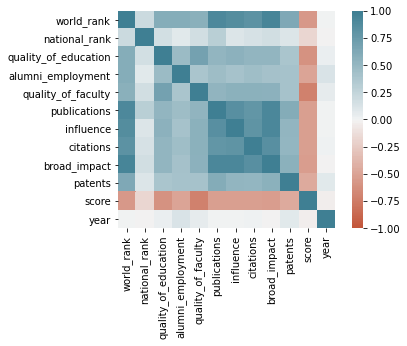

In [7]:
corr = df.corr()  # to see correlation between variables
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

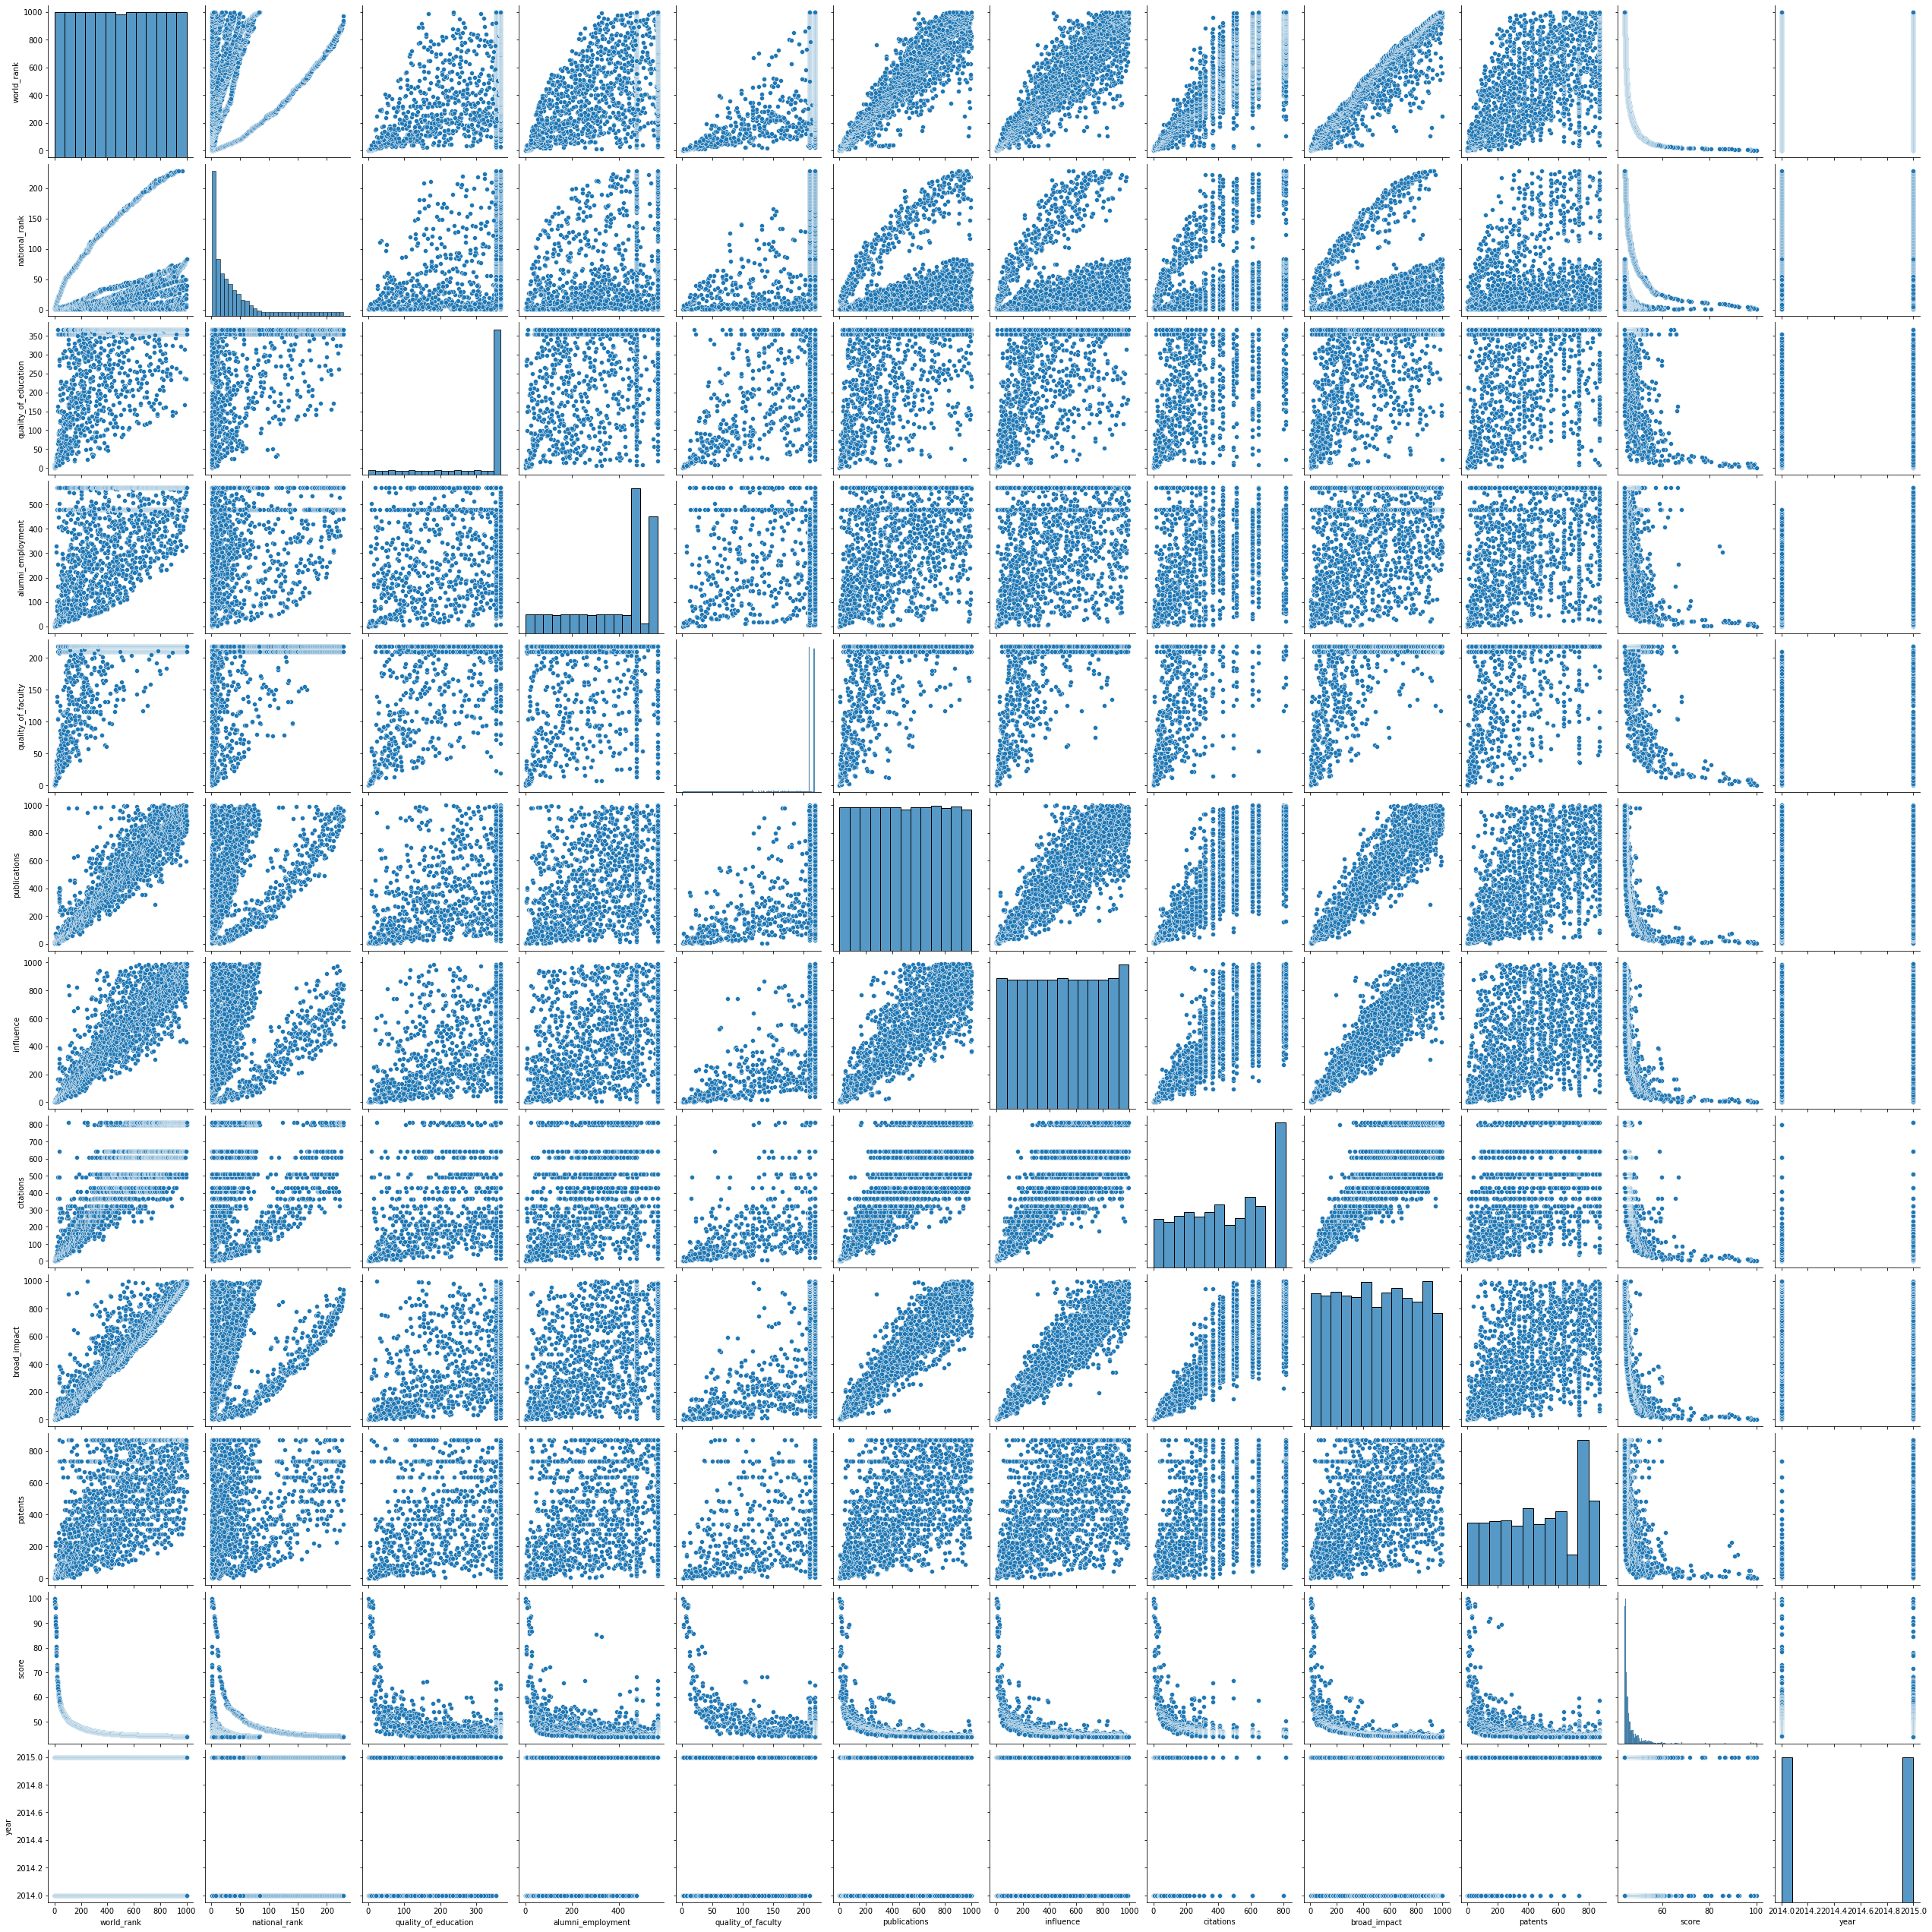

In [8]:
sns.pairplot(df, height= 3) # plotting each column with each column in various ways.. not too helpul but nice as an overview

<AxesSubplot:xlabel='quality_of_education', ylabel='world_rank'>

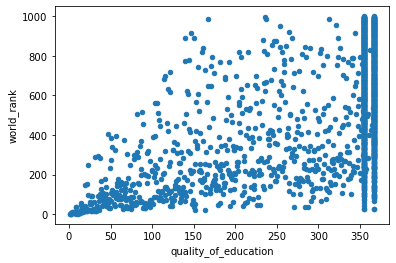

In [9]:
# now lets see if we can find anything between quality of education and world ranking
df.plot(kind='scatter', x='quality_of_education', y='world_rank')
# looks like there is some pattern to the plot...

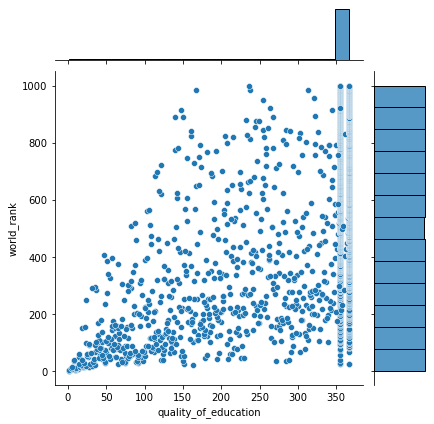

In [10]:
sns.jointplot(x='quality_of_education', y='world_rank', data= df)
# here we can see a significant increase in quality of education when world rank is closer to 1

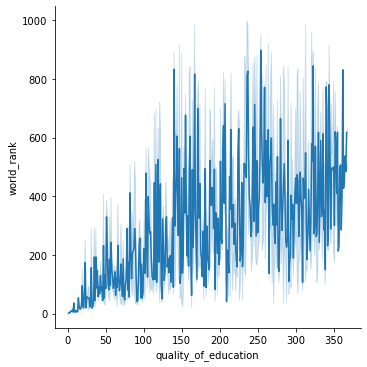

In [11]:
sns.relplot(x="quality_of_education", y="world_rank", kind="line", data=df) # here we can see the dots connected

<AxesSubplot:>

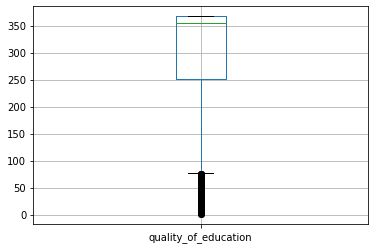

In [12]:
df.boxplot('quality_of_education')
# here are the boxlots of each column 

<AxesSubplot:>

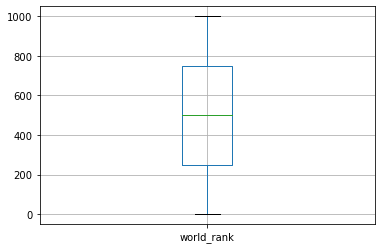

In [13]:
df.boxplot('world_rank')

<AxesSubplot:xlabel='quality_of_education', ylabel='world_rank'>

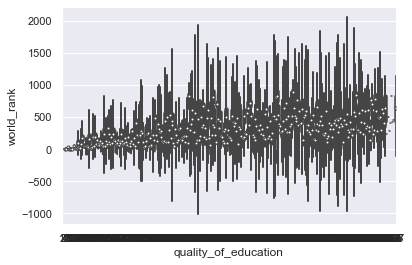

In [14]:
sns.set_theme(style="darkgrid", font_scale=1)
sns.violinplot(x='quality_of_education', y='world_rank', data= df)
# this doesnt seem to very helpful in our comparison

<AxesSubplot:xlabel='quality_of_education', ylabel='world_rank'>

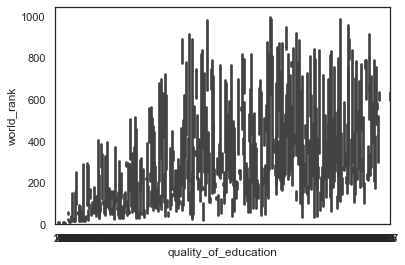

In [16]:
sns.set_theme(style="white", font_scale=1)
sns.barplot(x='quality_of_education', y='world_rank', data= df)
# this seems similar to regplot but less helpful